In [3]:
# pip install ndjson

Note: you may need to restart the kernel to use updated packages.


In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
with open('../../Datasets/amazon-video-games/Video_Games.json') as f:
    data = ndjson.load(f)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


In [5]:
df.shape

(2565349, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565349 entries, 0 to 2565348
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  style           object 
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 217.7+ MB


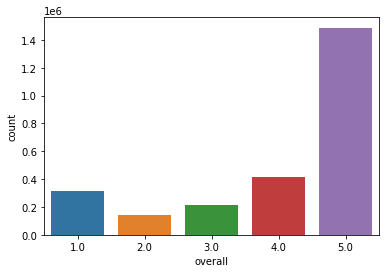

In [7]:
sns.countplot(data = df, x = 'overall');

In [8]:
len(df['asin'].value_counts(dropna=False))

71982

Random Sample of reviews

In [9]:
one_sample = df[df['overall'] == 1.0].sample(n=2000)
two_sample = df[df['overall'] == 2.0].sample(n=2000)
three_sample = df[df['overall'] == 3.0].sample(n=2000)
four_sample = df[df['overall'] == 4.0].sample(n=2000)
five_sample = df[df['overall'] == 5.0].sample(n=2000)

In [10]:
one_sample.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
2041147,1.0,True,"06 13, 2017",AZ5Q3IA6E0SN0,B019W2MK54,Amazon Customer,The scrolling already makes squeaking noise an...,One Star,1497312000,NaN,NaN,NaN
2399832,1.0,False,"07 8, 2012",A2RGY3RWZGPG53,B00742CIN4,Cammyp1,I was so happy to get this in the mail and gue...,This is a piece of crap!!!!!,1341705600,NaN,NaN,NaN
1044186,1.0,True,"04 30, 2011",AWS9RKBONFM1T,B006IUVDOS,Amazon Customer,I'd been looking at this game for a while and ...,Warning! Faulty Game!,1304121600,2,"{'Edition:': ' Standard', 'Platform:': ' PC'}",NaN
1084110,1.0,True,"11 13, 2013",A2O4BW77ZEA4V6,B007FTE2VW,John R Stone,According to mfg system requirements my system...,System requirements not correct,1384300800,6,{'Format:': ' Software Download'},NaN
1399749,1.0,False,"04 27, 2015",APUIZIRQZAV3N,B00F0DCH9Y,Andrew L,I'm a fast typist and this keyboard just can't...,Can't keep up with my typing after only 4 mont...,1430092800,NaN,NaN,NaN


In [11]:
one_sample.shape

(2000, 12)

In [12]:
sample_df = pd.concat([one_sample, two_sample, three_sample, four_sample, five_sample], axis=0)

In [13]:
sample_df['overall'].value_counts(dropna=False)

1.0    2000
2.0    2000
3.0    2000
4.0    2000
5.0    2000
Name: overall, dtype: int64

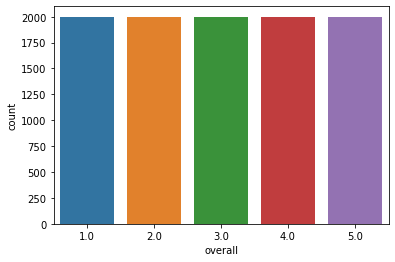

In [14]:
sns.countplot(data=sample_df, x='overall');

In [15]:
sample_reviews = df.sample(n=200000, random_state=20)

In [33]:
sample_df.to_csv('small_corpus.csv', index=False)

In [16]:
sample_reviews.to_csv('big_corpus.csv', index=False)